# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient 

import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sinan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q="bitcoin", language="en", page_size=100, sort_by="relevancy")

##btc_headlines

In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q="ethereum", language="en", page_size=100, sort_by="relevancy")

##eth_headlines

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass


btc_sentiment_df = pd.DataFrame(btc_sentiments)


# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiment_df = btc_sentiment_df[cols]


btc_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
4,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.108,0.058,0.833


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass


eth_sentiment_df = pd.DataFrame(eth_sentiments)


# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiment_df = eth_sentiment_df[cols]


eth_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849
4,2021-07-17,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.00000
mean,0.031184,0.044440,0.036470,0.91908
std,0.367657,0.057908,0.059182,0.07805
min,-0.827100,0.000000,0.000000,0.65300
25%,-0.102700,0.000000,0.000000,0.86775
50%,0.000000,0.000000,0.000000,0.92500
75%,0.318200,0.079500,0.069250,1.00000
max,0.865800,0.276000,0.287000,1.00000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.142013,0.052000,0.022330,0.925680
std,0.339548,0.058677,0.042855,0.069773
min,-0.812600,0.000000,0.000000,0.714000
25%,0.000000,0.000000,0.000000,0.868750
50%,0.000000,0.039000,0.000000,0.928000
75%,0.411525,0.093250,0.042000,1.000000
max,0.778300,0.194000,0.249000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum - 0.055300

Q: Which coin had the highest compound score?

A: Bitcoin - 0.865800

Q. Which coin had the highest positive score?

A: Bitcoin - 0.276000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer() 

# Create a list of stopwords
sw_list = stopwords.words('english')

# Expand the default stopwords list if necessary
#Remove the char word.
sw_list.append('char')

sw = set(sw_list)

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
       
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
        
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_tokens = []

for text in btc_sentiment_df['text']:
    article = text
    
    btc_tokens.append(tokenizer(article))
    
btc_sentiment_df['tokens'] = btc_tokens

btc_sentiment_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, ha, r..."
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
4,2021-06-23,"LONDON, June 23 (Reuters) - El Salvador is det...",0.2023,0.108,0.058,0.833,"[london, june, reuters, el, salvador, determin..."
...,...,...,...,...,...,...,...
95,2021-06-27,"By Nduka OrjinmoBBC News, Abuja\r\nimage copyr...",-0.6124,0.000,0.139,0.861,"[nduka, orjinmobbc, news, abujaimage, copyrigh..."
96,2021-07-18,The U.S. has fast become the new darling of th...,0.5859,0.095,0.000,0.905,"[us, ha, fast, become, new, darling, bitcoin, ..."
97,2021-07-11,North America's largest crypto mine is six mil...,0.0000,0.000,0.000,1.000,"[north, americas, largest, crypto, mine, six, ..."
98,2021-07-20,"Will it go back up? Probably, but for Bitcoin ...",0.4497,0.101,0.046,0.853,"[go, back, probably, bitcoin, investor, defini..."


In [14]:
# Create a new tokens column for Ethereum
eth_tokens = []

for text in eth_sentiment_df['text']:
    article = text
    
    eth_tokens.append(tokenizer(article))
    
eth_sentiment_df['tokens'] = eth_tokens

eth_sentiment_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
1,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2,2021-06-20,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[wasnt, long, ago, average, person, clue, nft,..."
3,2021-07-02,Bitcoin and Ethereum\r\nYuriko Nakao\r\nEther ...,0.3612,0.110,0.041,0.849,"[bitcoin, ethereumyuriko, nakaoether, overtook..."
4,2021-07-17,"""Anthony Di Iorio, a co-founder of the Ethereu...",0.6369,0.157,0.000,0.843,"[anthony, di, iorio, cofounder, ethereum, netw..."
...,...,...,...,...,...,...,...
95,2021-07-08,"What happened\r\nIt's Thursday, and cryptocurr...",0.0000,0.000,0.000,1.000,"[happenedits, thursday, cryptocurrencies, cras..."
96,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
97,2021-07-13,"What happened\r\nIt's Tuesday, and for the sec...",0.0000,0.000,0.000,1.000,"[happenedits, tuesday, second, day, row, crypt..."
98,2021-07-20,"Will it go back up? Probably, but for Bitcoin ...",0.4497,0.101,0.046,0.853,"[go, back, probably, bitcoin, investor, defini..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
#Reduce the list of lists (btc_tokens) to a single list.
btc_token_list = [item for sublist in btc_tokens for item in sublist]

# Generate the Bitcoin N-grams where N=2
btc_bigrams = ngrams(btc_token_list, n=2)

In [17]:
#Reduce the list of lists (eth_tokens) to a single list.
eth_token_list = [item for sublist in eth_tokens for item in sublist]

# Generate the Ethereum N-grams where N=2
eth_bigrams = ngrams(eth_token_list, n=2)

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_bigrams, 10)

[(('june', 'reuters'), 22),
 (('reuters', 'bitcoin'), 17),
 (('taken', 'june'), 13),
 (('july', 'reuters'), 11),
 (('june', 'reutersedgar'), 10),
 (('representation', 'virtual'), 9),
 (('illustration', 'taken'), 9),
 (('illustration', 'picture'), 9),
 (('picture', 'taken'), 9),
 (('el', 'salvador'), 8)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_bigrams, 10)

[(('taken', 'june'), 16),
 (('illustration', 'taken'), 15),
 (('bitcoin', 'ethereum'), 13),
 (('cryptocurrencies', 'bitcoin'), 11),
 (('ethereum', 'dogecoin'), 11),
 (('june', 'reutersdado'), 11),
 (('reuters', 'bitcoin'), 10),
 (('june', 'reuters'), 10),
 (('nonfungible', 'token'), 10),
 (('representations', 'cryptocurrencies'), 10)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

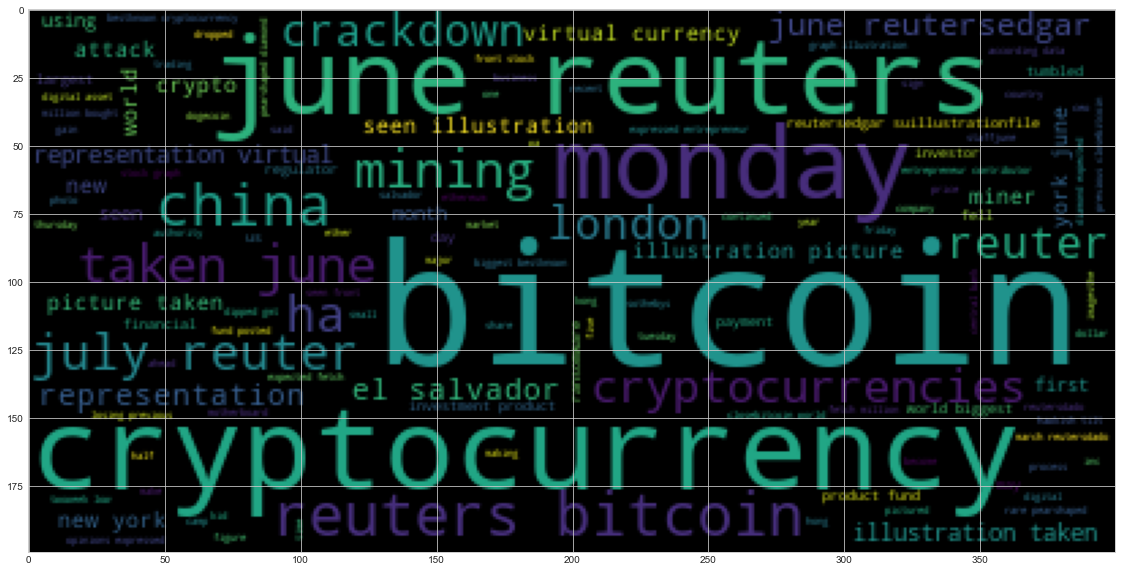

In [22]:
# Generate the Bitcoin word cloud
#Convert the list to string.
btc_big_string = ' '.join(btc_token_list)
wc = WordCloud().generate(btc_big_string)
plt.imshow(wc)

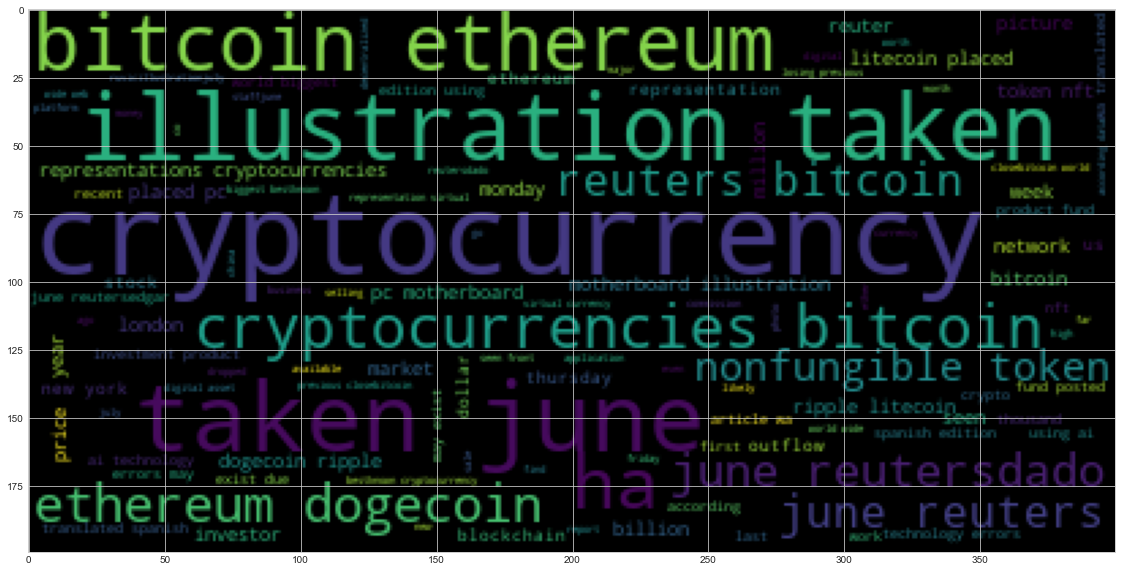

In [23]:
# Generate the Ethereum word cloud
#Convert the list to string.
eth_big_string = ' '.join(eth_token_list)
wc = WordCloud().generate(eth_big_string)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
btc_concat = ' '.join(btc_sentiment_df['text'])

In [28]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_concat)

# Add a title to the document
btc_doc.user_data["title"] = "NewsApi Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [30]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['Dogecoin', 'Reno', 'El Salvador', 'Aldo Baoicchi', 'Canadian', 'Daymak', 'Alex Castro', 'Verge', 'Three days', 'the holiday weekend', '$70m', '£50.5m', 'Bitcoin', 'Bitcoin and Ethereum', '2021', 'LONDON', 'June 23', 'Reuters', 'El Salvador', 'LONDON', 'June 23', 'Reuters', 'El Salvador', 'Pr', 'earlier this year', 'Dogecoin', 'Bitcoin', 'March 15, 2021', 'Dado Ruvic', 'June 30', 'Reuters', 'June 21', 'Reuters', 'Monday', 'China', 'Sichuan', 'Bitcoin', 'as low as $32,288', 'first', 'Bitcoin', 'June 14, 2021', 'Edgar Su', 'Reuters', '7.37%', '32,094.44', 'Bitcoin', 'Monday', 'China', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'GMT', 'Monday', '3,049.42', 'Bitcoin', '49.9%', 'Reuters', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'GMT', 'Monday', '3,049.42', 'Bitcoin', 'Reuters', 'Bitcoin', 'June 7, 2021', 'Edgar Su/Illustration/File Photo\r\n', 'Reuters', 'Reuters', 'June 25', 'Reuters', '7.37%', '32,094.44', 'Friday', '2,554.88', 'Bitcoin', '50.5', 'Bitcoin', 'May 19, 

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
eth_concat = ' '.join(eth_sentiment_df['text'])

In [32]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_concat)

# Add a title to the document
eth_doc.user_data["title"] = "NewsApi Ethereum NER"

In [33]:
# Render the visualization
displacy.render(eth_doc, style='ent') 

In [35]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['Ethereum', 'Ethereum Killers', 'Solana', 'Bitcoin and Ethereum', '2021', 'NFT', 'hundreds of thousands', 'Yuriko Nakao', 'Friday', 'Anthony Di Iorio', 'Ethereum', 'Bloomberg', 'Slashdot', 'more than $13 billion', '2.0', 'Photothek/Getty Images', 'more than $13 billion', '2.0', '$40 billion', '2025', 'JPMorgan', 'NFT', 'as much as', '90 percent', 'recent weeks', 'recent months', 'Spanish', 'AI', 'The Securities and Exchange Commission', 'Reuters', 'June 25', 'Reuters', '7.37%', '32,094.44', 'Friday', '2,554.88', 'Bitcoin', '50.5', 'Getty Images\r\nInvestors', 'the third week', 'February 2018', 'Reuters', 'June 25', 'Reuters', '8.51%', '31,699.83', '22:04', 'GMT', 'Friday', '2,937.27', 'Bitcoin', 'London', 'Ethereum', '12 965', 'between August 3-5, 2021', 'Clie', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'GMT', 'Monday', '3,049.42', 'Bitcoin', '49.9%', 'Reuters', 'June 21', 'Reuters', '8.57%', '32,540.35', '2011', 'GMT', 'Monday', '3,049.42', 'Bitcoin', 'Reuters', 'Bitcoin', 

---